In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [61]:
# Load dataset
data_train  = pd.read_csv("Dataset/train.csv")
data_test   = pd.read_csv("Dataset/test.csv")
data_train  = data_train[["PassengerId","Survived","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_test   = data_test[["PassengerId","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_train.fillna(0)
data_test.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,S


In [62]:
x_train     = data_train[["Sex","Age","SibSp","Parch",
                          "Fare","Embarked"]].values
y_train     = data_train[["Survived"]].values
row,coloumn = x_train.shape

In [63]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[1, 88, 6, 6, 247, 3]
[0, 0, 0, 0, 0, 0]


In [65]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [66]:
x_train

array([[1.0, 0.3181818181818182, 0.16666666666666666, 0.0,
        0.0728744939271255, 0.6666666666666666],
       [0.0, 0.5795454545454546, 0.16666666666666666, 0.0,
        0.8380566801619433, 0.0],
       [0.0, 0.38636363636363635, 0.0, 0.0, 0.1659919028340081,
        0.6666666666666666],
       ...,
       [0.0, 1.0, 0.16666666666666666, 0.3333333333333333,
        0.5303643724696356, 0.6666666666666666],
       [1.0, 0.38636363636363635, 0.0, 0.0, 0.6194331983805668, 0.0],
       [1.0, 0.4772727272727273, 0.0, 0.0, 0.1214574898785425,
        0.3333333333333333]], dtype=object)

In [67]:
# Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [68]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 6
net_hidden1 = 12
net_hidden2 = 24
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.5
epochs = 5

In [69]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(6, 12)
(12, 24)
(24, 1)


In [70]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.19133838]  | acc :  0.7261503928170595
epoch :  1  | error :  [0.16416043]  | acc :  0.7833894500561167
epoch :  2  | error :  [0.16009824]  | acc :  0.7811447811447811
epoch :  3  | error :  [0.15812611]  | acc :  0.7856341189674523
epoch :  4  | error :  [0.15658444]  | acc :  0.7822671156004489


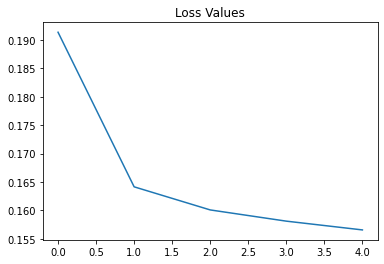

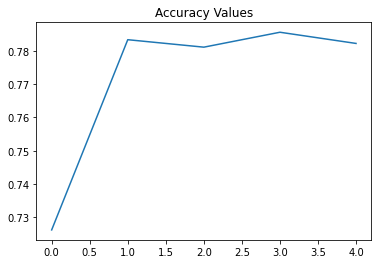

In [71]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [72]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [73]:
prediksi = predict([x_train[4]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : 1')
  elif i == 0 :
    print('Result : 0')

[0]
Result : 0


In [74]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [78]:
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox


class Test:
    def __init__(self, tk):
        self.var = StringVar()
        self.data = (0, 1)
        self.lb0 = Label(tk,  text = 'MULTILAYER PERCEPTRON PREDIKSI KESELAMATAN PENUMPANG TITANIC',
                         font = ("Times",12)).place(x=15,y=0)
        self.lb1 = Label(tk,  text = 'Sex',font = ("Times",9)).place(x=5,y=50)
        self.lb2 = Label(tk,  text = 'Age',font = ("Times",9)).place(x=5,y=75)
        self.lb3 = Label(tk,  text = 'SibSp',font = ("Times",9)).place(x=5,y=100)
        self.lb4 = Label(tk,  text = 'Parch',font = ("Times",9)).place(x=5,y=125)
        self.lb5 = Label(tk,  text = 'Fare',font = ("Times",9)).place(x=5,y=150)
        self.lb6 = Label(tk,  text = 'Embarked',font = ("Times",9)).place(x=5,y=175)
        #---------------------------------------------------------------------------------------------
        self.cb1 = Combobox(tk, values=self.data,font = ("Times",9), width=17)
        self.cb1.place(x=80, y=50)
        self.e2  = Entry(tk,font = ("Times",9) ).place(x=80,y=75)
        self.e3  = Entry(tk,font = ("Times",9) ).place(x=80,y=100)
        self.e4  = Entry(tk,font = ("Times",9) ).place(x=80,y=125)
        self.e5  = Entry(tk,font = ("Times",9) ).place(x=80,y=150)
        self.e6  = Entry(tk,font = ("Times",9) ).place(x=80,y=175)
        #---------------------------------------------------------------------------------------------
        self.b1  = Button(tk, text="Prediksi", command=self.select).place(x=300, y=250, anchor=CENTER)
        self.lb7 = Label(tk,  text = 'Hasil').place(x=300, y=300, anchor=CENTER)
        
    def select(self):
        data   = []
        value1 = (float(self.cb1.get())-minn[0])/(maxx[0]-minn[0])
        #messagebox.showinfo("Warn", "You selected " + value)
        value2 = (float(self.e2.get())-minn[1])/(maxx[1]-minn[1])
        value3 = (float(self.e3.get())-minn[2])/(maxx[2]-minn[2])
        value4 = (float(self.e4.get())-minn[3])/(maxx[3]-minn[3])
        value5 = (float(self.e5.get())-minn[4])/(maxx[4]-minn[4])
        value6 = (float(self.e6.get())-minn[5])/(maxx[5]-minn[5])
        data.append(value1)
        data.append(value2)
        data.append(value3)
        data.append(value4)
        data.append(value5)
        data.append(value6)
        HasilPredict = []
        for i in data:
            # Hidden Layer1
            o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
            o_hidden1 = sig(o_hidden1)
            # Hidden Layer2
            o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
            o_hidden2 = sig(o_hidden2)
            # Outpur Layer
            o_output  = np.matmul(o_hidden2, w_output) + b_output
            o_output  = sig(o_output)
            HasilPredict.append(round(float(o_output)))
        for i in HasilPredict:
            if i == 1 :
                a = 'Selamat'
            elif i == 0 :
                a = 'Tewas'
        self.lb7.config(text=a)
tk = Tk()
tk.geometry("600x350")
tk.title("MULTILAYER PERCEPTRON")
tt = Test(tk)
tk.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python3_7\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-78-c1528a715283>", line 32, in select
    value1 = self.cb1.get()-minn[0]/(maxx[0]-minn[0])
TypeError: unsupported operand type(s) for -: 'str' and 'float'
